In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Assigning the dataframe url to a variable.
url_df = "https://github.com/Jefexon/Alura-Data-Immersion-3/blob/main/Data/data_experiments.zip?raw=true"
url_df_results = "https://github.com/Jefexon/Alura-Data-Immersion-3/blob/main/Data/data_results.csv?raw=true"

#Assigning the uncompressed csv dataframe to a variable.
df_results = pd.read_csv(url_df_results)
df = pd.read_csv(url_df, compression = 'zip')


In [19]:
df.head()

,id,treatment,duration,dose,composite,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,with_drug,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,with_drug,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,with_drug,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,with_drug,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,with_drug,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [20]:
df_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
#### Checking if there are only zeros

In [5]:
df_results['acat_inhibitor'].unique()

array([0, 1], dtype=int64)

**1** is found when a mechanism of action (names of columns on the right of **id**, e.g. *11-beta-hsd1-inhibitor) is activated, in the contrary **0**.


----------------------
### Finding the most used mechanism of action.

#### Selecting desired columns using *.selec_dtypes('int64)*.

In [6]:
counting_moa = df_results.select_dtypes('int64').sum().sort_values(ascending=False)

In [7]:
counting_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

#### Selecting desired columns using *.drop('id', axis=1)*.
The first parameter in *.drop()* in this case is the name of the column we want to exclude, and the second parameter (*axis=1*) specifies it is a column (use *axis=0* for row).

In [8]:
counting_moa = df_results.drop('id', axis=1).sum().sort_values(ascending=False)

In [9]:
counting_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

---
### Finding how many times each *id* was 'activated'.

In [14]:
df_results.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

#### Adding column *n_moa* wich is the sum of the mechanisms of action activated, calculated previously

In [22]:
df_results['n_moa'] = df_results.drop('id', axis=1).sum(axis=1)
df_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### Adding column *activated_moa* which tells me if there has been at least 1 activation.

In [27]:
df_results['activated_moa'] = df_results['n_moa'] != 0
df_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,activted_moa,activated_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,True,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,True,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,True,True


----------------------
### Merging *df* with *df_results*

In [30]:
df_combined = pd.merge(df, df_results[['id', 'n_moa', 'activated_moa']], on='id')
df_combined.head()

,id,treatment,duration,dose,composite,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,activated_moa
0,id_000644bb2,with_drug,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,2,True
1,id_000779bfc,with_drug,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,with_drug,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,6,True
3,id_0015fd391,with_drug,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,with_drug,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,2,True


In [32]:
df_combined.query('treatment == "with_control"')['activated_moa'].value_counts()

False    1866
Name: activated_moa, dtype: int64

----------------------

<AxesSubplot:xlabel='composite', ylabel='g0'>

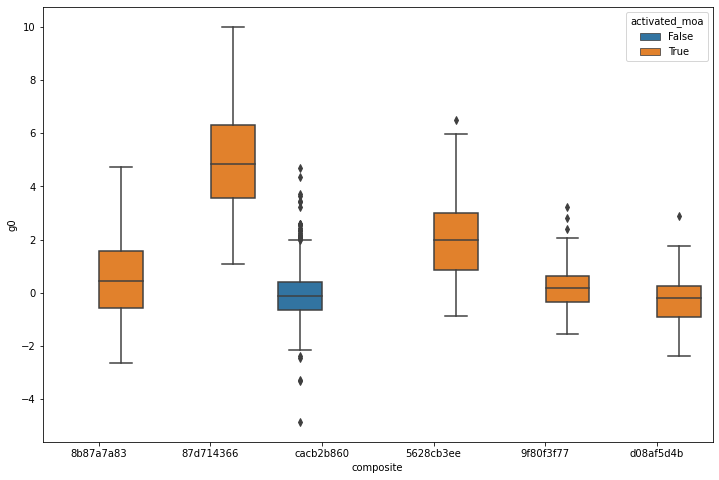

In [41]:
main_composite = df_combined['composite'].value_counts().index[:6]
plt.figure(figsize=(12, 8))
sns.boxplot(data = df_combined.query('composite in @main_composite'), y= 'g0', x='composite', hue='activated_moa')

### Challenge 1: Find the top 10 actions (e.g. inhibitor, antagonist...).

### Challenge 2: Create column *is_control* for when treatment == with_control.

### Challenge 3: Create 3 columns to indicate if duration is 24, 48, 72. One column for each duration, use 0s and 1s or True and False.

### Challenge 4: Study about merging dataframes.
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Challenge 5: Analyse more in depth the boxplot, considering duration and dose (choose one drug and compare it with control).

### Challenge 6: Discover if we have any composite that depending on the configuration of the expermient, activate or not any MOA.

### Challenge 7: Discover if we have any composite that depending on the configuration of the expermient, activate different MOAs.

### Challenge 8: Summary
